Optimization terminated successfully.
         Current function value: 0.486104
         Iterations 6
Accuracy :  0.7624309392265194
Sensitivity :  0.9699248120300752
Specificity :  0.1875


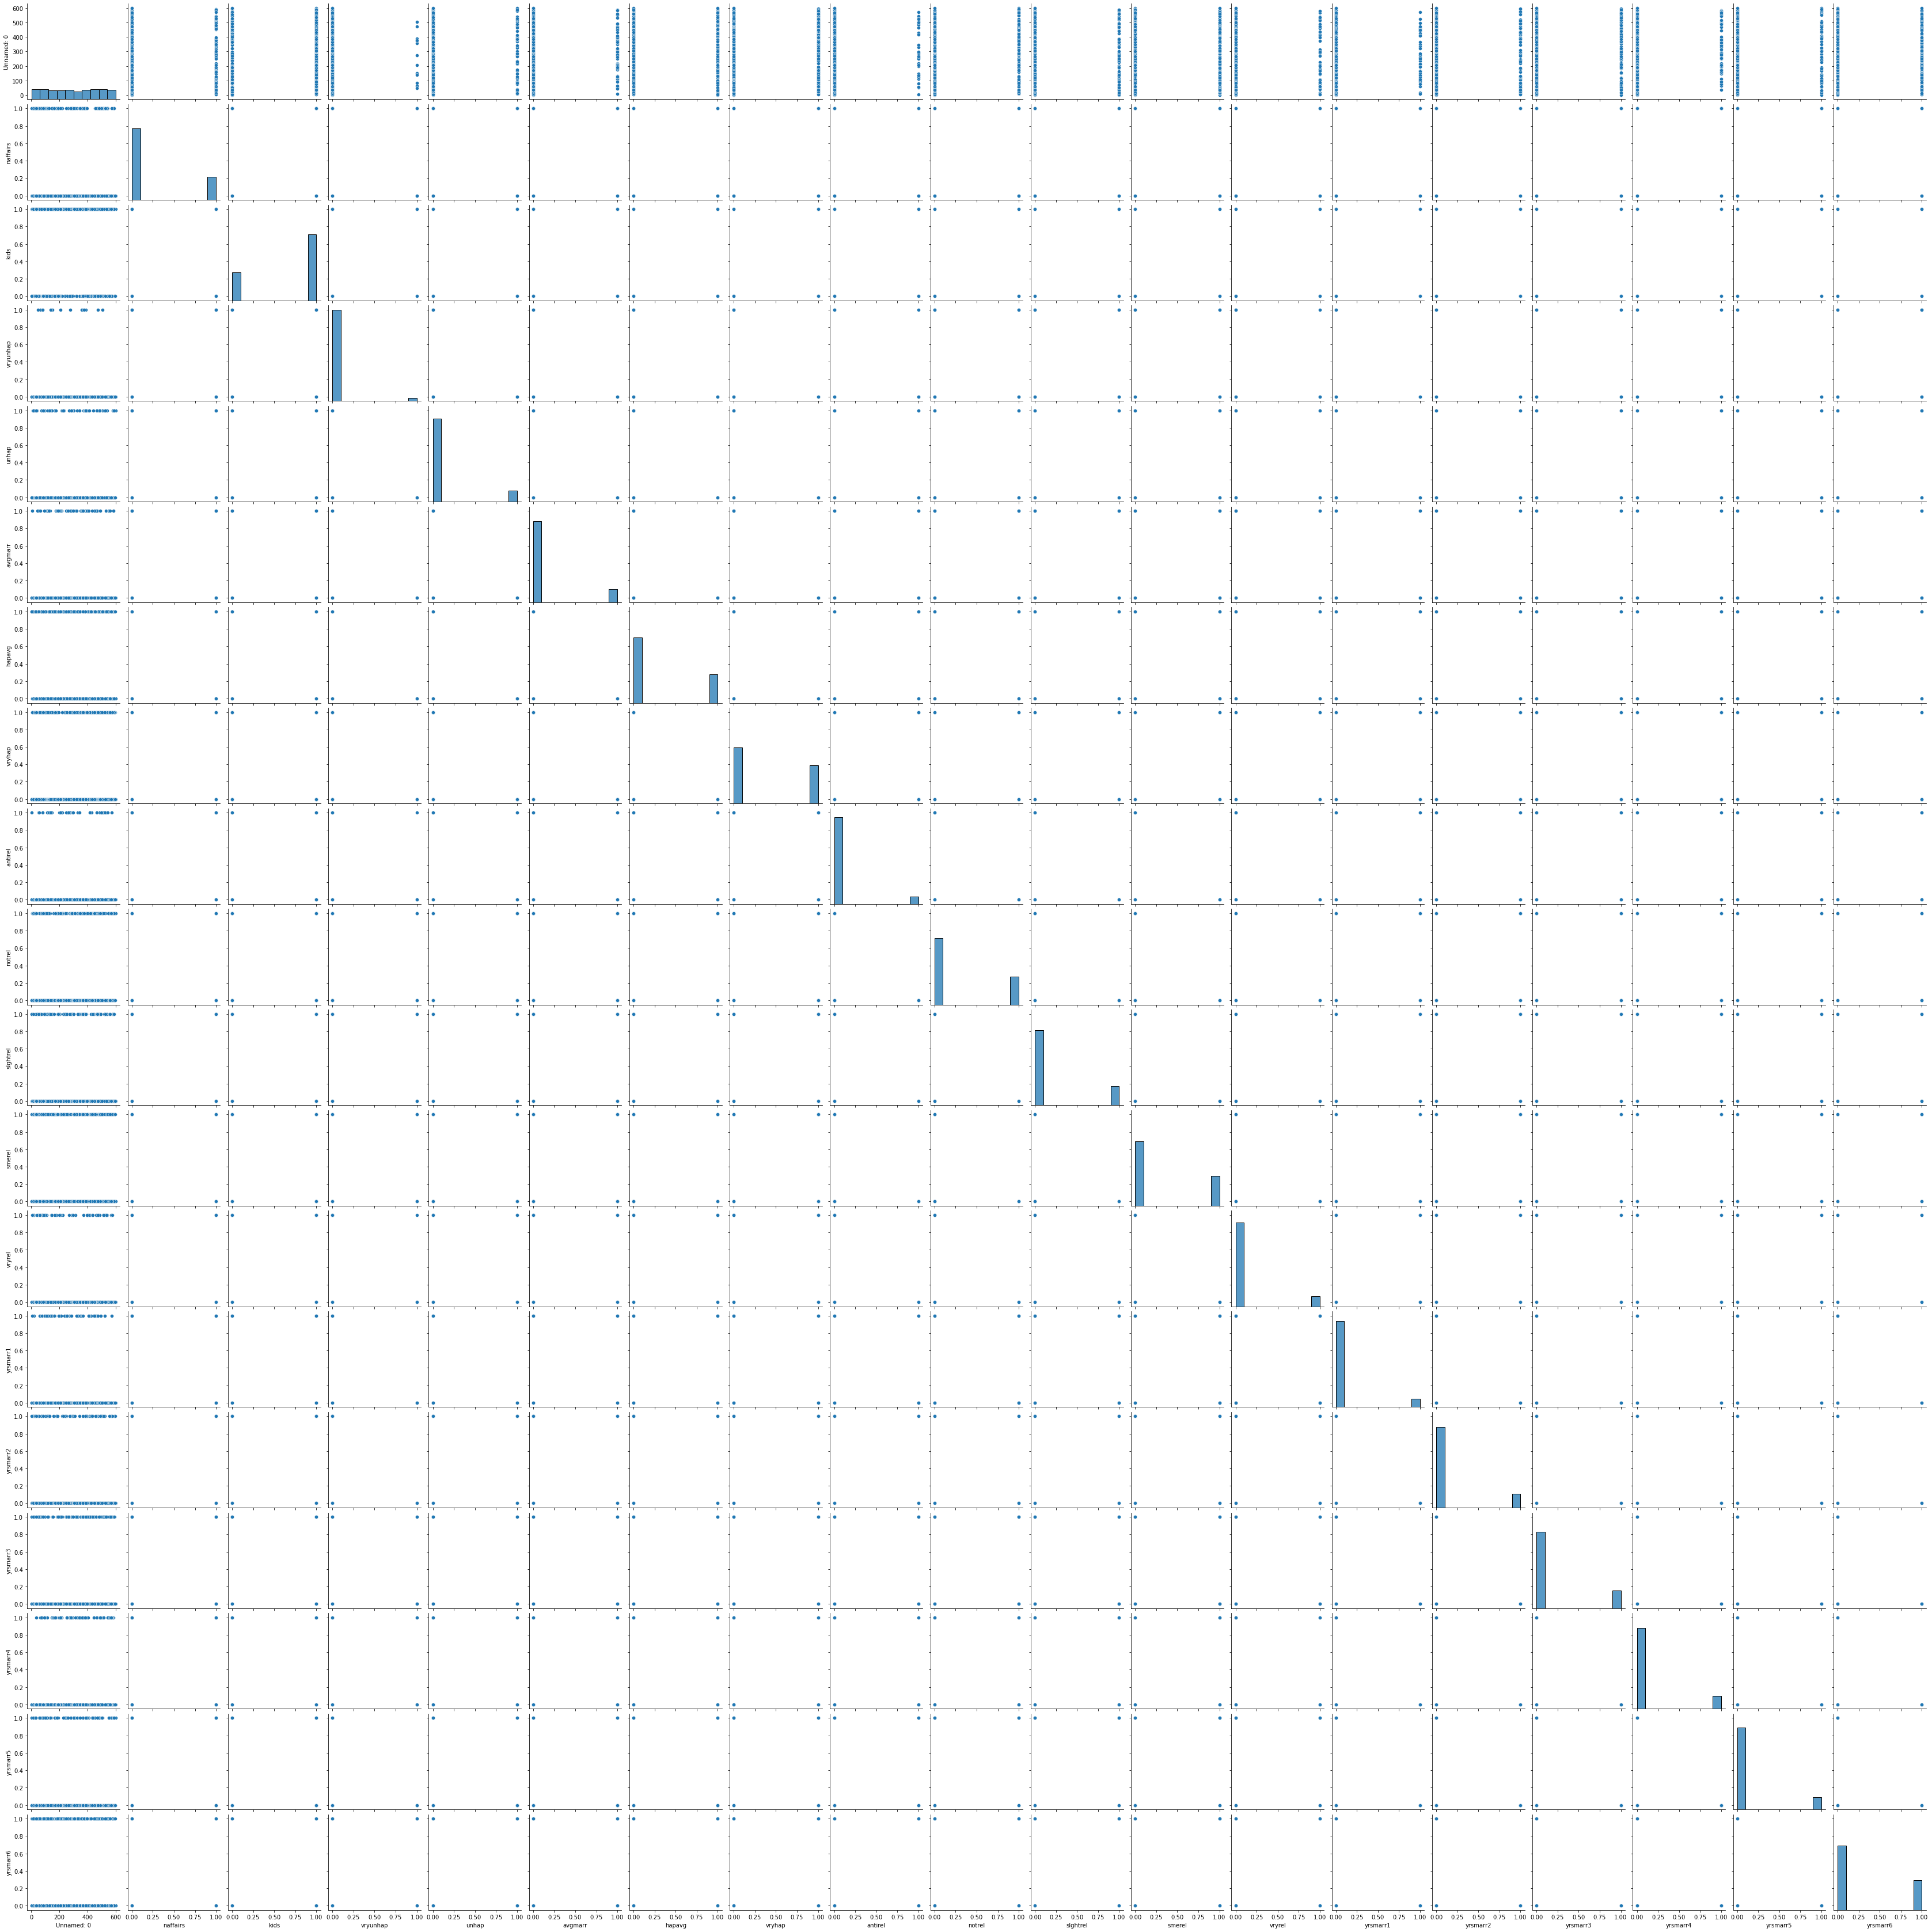

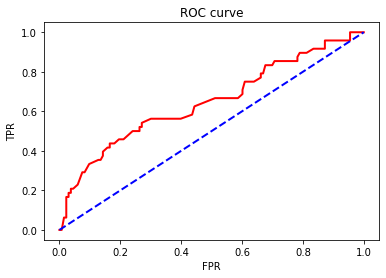

In [1]:
#Logistic Regression (Module -9)
#1)Problem Statement: -
#A psychological study has been conducted by a team of students at a University on married couples to determine the cause and effect on their married life and why they tend to have an extra marital affair, they have surveyed and collected a sample of data on which they would like to do further analysis to improve the relationship bond between couple, is it even possible to do so? Using your skills of Machine Learning apply Logistic Regression Model on the data and correctly classify whether a given person will have an affair or not given the set of attributes. 
#Convert naffairs column to Discreet Binary before proceeding with algorithm.
#Answer ;- 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
Affairs = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Logistic regression\Affairs.csv")
Affairs.naffairs[Affairs.naffairs==0]=0
Affairs.naffairs[Affairs.naffairs>0]=1

Affairs.describe()

Affairs.head(11)
from sklearn.model_selection import train_test_split

train_data,test_data = train_test_split(Affairs,test_size = 0.3)
import statsmodels.formula.api as sm
logit_model = sm.logit('naffairs ~kids+vryunhap+unhap+avgmarr+hapavg+vryhap+antirel+notrel+slghtrel+smerel+vryrel+yrsmarr1+yrsmarr2+yrsmarr3+yrsmarr4+yrsmarr5+yrsmarr6',data = train_data).fit()

logit_model.summary()
train_data.corr()

import seaborn as sns
sns.pairplot(train_data.iloc[:,:])
predict = logit_model.predict((test_data[["kids", "vryunhap", "unhap", "avgmarr", "hapavg", "vryhap", "antirel", "notrel", "slghtrel", "smerel", "vryrel", "yrsmarr1", "yrsmarr2", "yrsmarr3", "yrsmarr4", "yrsmarr5", "yrsmarr6"]]))

from sklearn.metrics import confusion_matrix, accuracy_score

cnf_matrix = confusion_matrix(test_data['naffairs'], predict > 0.5 )
cnf_matrix

accuracy = (126+7)/(126+8+40+7)
accuracy

cnf_matrix
total1=sum(sum(cnf_matrix))
accuracy1=(cnf_matrix[0,0]+cnf_matrix[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(test_data.naffairs, predict)
import matplotlib.pyplot as plt
plt.figure()

plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site           1000 non-null   float64
 1   Age            1000 non-null   int64  
 2   area           1000 non-null   float64
 3   usage          1000 non-null   float64
 4   Ad_Topic_Line  1000 non-null   object 
 5   City           1000 non-null   object 
 6   Male           1000 non-null   int64  
 7   Country        1000 non-null   object 
 8   Timestamp      1000 non-null   object 
 9   ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


C:\Users\tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


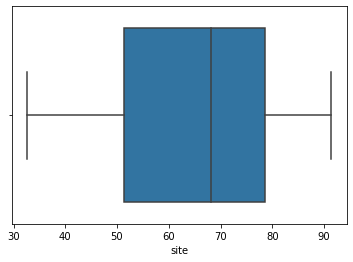

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


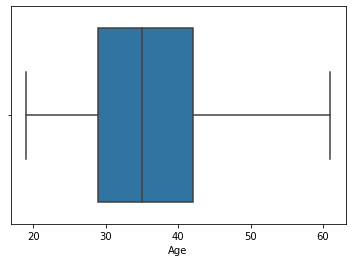

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


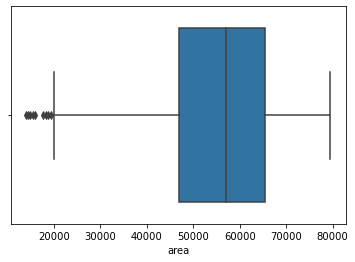

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


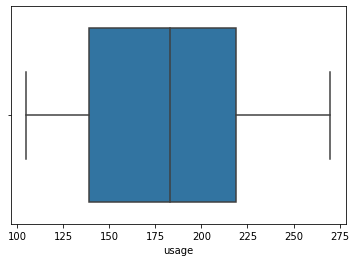

Ad_Topic_Line
Cloned 5thgeneration orchestration              0.001
Synchronized multi-tasking ability              0.001
Customer-focused impactful success              0.001
Open-source optimizing parallelism              0.001
Organic logistical adapter                      0.001
                                                ...  
Enhanced zero tolerance Graphic Interface       0.001
De-engineered tertiary secured line             0.001
Reverse-engineered well-modulated capability    0.001
Integrated coherent pricing structure           0.001
Virtual 5thgeneration emulation                 0.001
Name: Ad_Topic_Line, Length: 1000, dtype: float64


City
Lisamouth         0.003
Williamsport      0.003
Wrightburgh       0.002
Lake Jose         0.002
Robertfurt        0.002
                  ...  
Burgessside       0.001
Hurleyborough     0.001
Garychester       0.001
East Kevinbury    0.001
Ronniemouth       0.001
Name: City, Length: 969, dtype: float64


Male
0    0.519
1    0.481
Na

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       136
           1       1.00      0.95      0.97       114

    accuracy                           0.98       250
   macro avg       0.98      0.97      0.98       250
weighted avg       0.98      0.98      0.98       250



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished

[2022-08-19 10:59:50] Features: 4/1 -- score: 0.9653333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s finished

[2022-08-19 10:59:51] Features: 3/1 -- score: 0.9573333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished

[2022-08-19 10:59:51] Features: 2/1 -- score: 0.952[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       136
           1       1.00      0.95      0.97       114

    accuracy                           0.98       250
   macro avg       0.98      0.97      0.98       250
weighted avg       0.98      0.98      0.98       250



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s finished

[2022-08-19 10:59:52] Features: 1/1 -- score: 0.8933333333333333C:\Users\tarun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


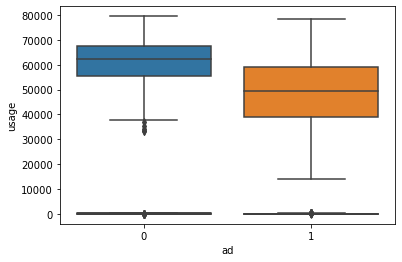

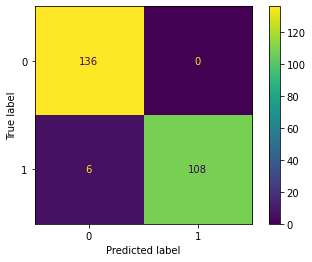

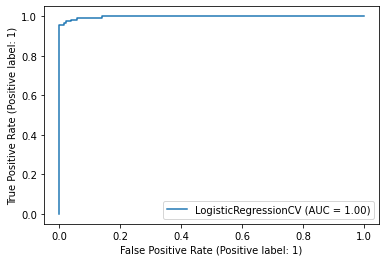

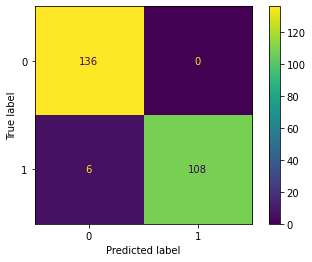

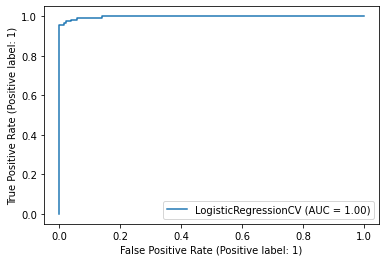

In [3]:
################################################################################################
#Problem Statement: -
#2)In this time and age of widespread internet usage, effective and targeted marketing play a vital role, a marketing company would like to develop their strategy by analyzing their customer data and how effectively they can do targeted marketing, for this historical data has been collected of users clicking on ad given different factors such as age, location, time of activity and more. Perform Logistic Regression on the given data and classify the user who click’s on ad’s and who does not click on ad. 
#Answer;-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

advertising  = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Logistic regression\advertising.csv")
advertising.columns
advertising.rename(columns={'Daily_Time_ Spent _on_Site': 'site', 'Area_Income':'area','Daily Internet Usage':'usage','Clicked_on_Ad':'ad'},inplace=True)
advertising.columns
advertising.head(11)
advertising.describe()
advertising.isna().sum() #there are no NA value in the data 


advertising.head()
# Clicked on ad is the target columns

advertising.info()

### the dataset has mixed of numerical & categorical columns
advertising['ad'].value_counts()
# target column is 50-50 balance, perfect

num_cols = ['site','Age','area','usage']

## Checking for outliers

for col in num_cols:
    sns.boxplot(advertising[col]);plt.show()
    
# Only are_income has a few outliers but they are very close to the IQR range, so not much need for outlier treatment

# let us check which variables have a bearing on the clicked on add variable using plots

sns.boxplot(x = 'ad', y = 'site', data = advertising)
sns.boxplot(x = 'ad', y = 'Age', data = advertising)
sns.boxplot(x = 'ad', y = 'area', data = advertising)
sns.boxplot(x = 'ad', y = 'usage', data = advertising)
# daily internet usage has the most separation among the plots,therfore could be most important variable amongst the numericals ones
# Area - income has the least separation, so could not be important
# we will explore the importance during feature selection

### Categorical features
# first let us ensure there are no constant features(very less or 0 variance)

for col in advertising.columns:
    if col not in num_cols:
        print(col)
        print(advertising[col].value_counts(normalize = True))
        print('\n')

# timestamp is not required we delete it

# Ad_Topic_Line & City have very low percentage values let us check the unique observations

advertising['Ad_Topic_Line'].nunique() # 1000 unique values = no. of rows, so useless column
advertising['City'].nunique() # 969 unique values - useless column
advertising['Country'].nunique() # 237 unique values - to much variation

# therfore none of the categorical column seem to be useful, they have too much variation, except male columns

# removing useless cat columns

adv_2 = advertising.drop(['Ad_Topic_Line','City','Country','Timestamp'], axis = 1)

adv_2.info()

from sklearn.preprocessing import StandardScaler

X = adv_2.drop('ad', axis = 1)
y = adv_2['ad']

from sklearn.model_selection import train_test_split

# splitting data into training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train[num_cols])
scaled_X_train = scaler.fit_transform(X_train[num_cols])
scaled_X_test = scaler.transform(X_test[num_cols])

scaled_X_train = pd.concat([pd.DataFrame(scaled_X_train, columns = num_cols),X_train['Male'].reset_index(drop = True)], axis = 1)
scaled_X_test = pd.concat([pd.DataFrame(scaled_X_test, columns = num_cols),X_test['Male'].reset_index(drop = True)], axis = 1)

# model Building

from sklearn.linear_model import LogisticRegressionCV
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train, y_train)

# checking accuracy

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

y_pred = log_model.predict(scaled_X_test)
y_train_pred = log_model.predict(scaled_X_train)

confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
# accuracy of 97.6% on test dataset

accuracy_score(y_train, y_train_pred)
# accuracy of 96.8% on train data

## model is right fit and good fit

plot_confusion_matrix(log_model, scaled_X_test, y_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_model, scaled_X_test, y_test)

### Feature selection - - let us see if we can eliminate a few features which are not usefull

# 1st let us check for multicolinearity among the numerical columns

X_train[num_cols].corr()
# the highest correlation is 0.51, no case of multi colinearity exists

# since number of features are very less, we can use Wrapper - forward selection 

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(LogisticRegressionCV(),
          k_features=(1,5),
          forward=False,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=2)

sfs = sfs.fit(scaled_X_train, y_train)

pd.DataFrame.from_dict(sfs.get_metric_dict()).T
# accuracy doesn't improve much beyond 4 features
 
feat_sel = pd.DataFrame.from_dict(sfs.get_metric_dict()).T.loc[4,'feature_names']

### Building model with reduced features

log_model_2 = LogisticRegressionCV()
log_model_2.fit(scaled_X_train.loc[:,feat_sel], y_train)

# checking accuracy

y_pred = log_model_2.predict(scaled_X_test.loc[:,feat_sel])
y_train_pred = log_model_2.predict(scaled_X_train.loc[:,feat_sel])

confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
# accuracy of 97.6% on test dataset

accuracy_score(y_train, y_train_pred)
# accuracy of 96.8% on train data

## we removed the Male column and got the exact same accuracy on the train & test datasets

plot_confusion_matrix(log_model_2, scaled_X_test.loc[:,feat_sel], y_test)
print(classification_report(y_test, y_pred))

plot_roc_curve(log_model, scaled_X_test, y_test)


In [5]:
#Problem Statement: -
#3)Prediction of election results has become trivial in these days, the outcome variable is (0/1) and the other factors that affect a candidate win or loss is amount of money spent, popularity and more. Perform Logistic Regression on the dataset and classify the candidates.
#Answer ;- 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
election = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Logistic regression\election_data.csv")
election.head(11)
election.describe()
election.isna().sum() #there are NA value in the dataset 
election.columns
election.rename(columns={'Election-id':'id','Amount Spent':'amount','Popularity Rank':'rank'},inplace=True)
election.columns
# Imputating the missing values           
mean_value = election.id.mean()
mean_value
election.id = election.id.fillna(mean_value)
election.id.isna().sum()
#Mode for result column 
mode_Result = election.Result.mode()
mode_Result
election.Result = election.Result.fillna((mode_Result)[0])
election.Result.isna().sum()

#Mode for Year column 
mode_Year = election.Year.mode()
mode_Year
election.Year = election.Year.fillna((mode_Year)[0])
election.Year.isna().sum()

#Mode for amount column 
mode_amount = election.amount.mode()
mode_amount
election.amount = election.amount.fillna((mode_amount)[0])
election.amount.isna().sum()

#Mode for rank column 
election["rank"].mode()
mode_rank = election["rank"].mode()
election['rank'] = election['rank'].fillna(mode_rank)

from sklearn.model_selection import train_test_split

train_data,test_data = train_test_split(election,test_size = 0.3)
import statsmodels.formula.api as sm
logit_model = sm.logit('Result ~ id +Year + amount + rank', data = train_data).fit(method = "bfgs")
logit_model.summary()
train_data.corr()

import seaborn as sns
sns.pairplot(train_data.iloc[:,:])
predict = logit_model.predict((test_data[["Result", "id", "Year", "amount","rank"]]))

from sklearn.metrics import confusion_matrix, accuracy_score

cnf_matrix = confusion_matrix(test_data['Result'], predict > 0.5 )
cnf_matrix

accuracy = (0+3)/(0+1+0+3)
accuracy

cnf_matrix
total1=sum(sum(cnf_matrix))
accuracy1=(cnf_matrix[0,0]+cnf_matrix[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(test_data.Result, predict)
import matplotlib.pyplot as plt
plt.figure()

plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

plt.plot([0, 1], [0, 1]

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_21144/2722531972.py, line 88)

In [ ]:
#Problem Statement: 
#In Financial Institutions getting their customers to do a fixed deposit in the banks is a vital and at most important for the bank as they bank uses it and pays an interest amount to those deposited customers. To ask every customer for a term deposit is not viable as well as time consuming process, can you come up with a Logistic Regression model to predict customers who will do a term deposit or not. 
#4)The output variable in the dataset is Y which is discreet and binary. Snapshot of the dataset is given below.
#Answer;- 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
bank = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Logistic regression\bank_data.csv")
bank.describe()
bank.head(11)
bank.columns
bank.rename(columns={"con_cellular":"cellular","con_telephone":"telephone","con_unknown":"unknown","joblue.collar":"collar","joself.employed":"employed","joadmin":"admin"},inplace=True)
bank.columns
from sklearn.model_selection import train_test_split

train_data,test_data = train_test_split(bank,test_size = 0.3)
import statsmodels.formula.api as sm
train_data=train_data.rename(columns={'joadmin.':'joadmin'})
logit_model = sm.logit('y ~ age+default+balance+housing+loan+duration+campaign+pdays+previous+poutfailure+poutother+poutsuccess+poutunknown+cellular+telephone+unknown+divorced+married+single+joadmin+collar+joentrepreneur+johousemaid+jomanagement+joretired+employed+joservices+jostudent+jotechnician+jounemployed+jounknown',data = train_data).fit(method = "bfgs")

logit_model.summary()
train_data.corr()

import seaborn as sns
sns.pairplot(train_data.iloc[:,:])
predict = logit_model.predict((test_data[["y", "default", "balance", "housing", "loan", "duration", "campaign", "pdays", "poutfailure", "poutother", "poutsuccess", "poutunknown", "cellular", "telephone", "unknown", "divorced", "married","single","joadmin","collar","joentrepreneur","johousemaid","jomanagement","joretired","employed","joservices","jostudent","jotechnician","jounemployed","jounknown"]]))

from sklearn.metrics import confusion_matrix, accuracy_score

cnf_matrix = confusion_matrix(test_data['y'], predict > 0.5 )
cnf_matrix

accuracy = (2658+140)/(2685+140+2000+825)
accuracy

cnf_matrix
total1=sum(sum(cnf_matrix))
accuracy1=(cnf_matrix[0,0]+cnf_matrix[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(test_data.naffairs, predict)
import matplotlib.pyplot as plt
plt.figure()

plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show() 

C:\Users\tarun\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\tarun\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\tarun\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\tarun\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.250800
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 40


C:\Users\tarun\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\tarun\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
